In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

DATASET_FOLDER  = "../Dataset/ThistlePDOWSClassic_20240203_2k.csv"


In [74]:
df = pd.read_csv(DATASET_FOLDER)
df["Team"] = df["Team"].fillna("No Team")
df.head()

,Pos,Race No,Name,Time,Category,Cat Pos,Gender,Gen Pos,Team
0,1,521,THONG ZHEN NING,00:25:25,16-19,1,Male,1,Wahoo Swimming Teamn
1,2,373,LEONG WEI SHENG IAN,00:25:36,16-19,2,Male,2,Singapore Sports School
2,3,309,GABRIEL FRANCIS MCCARTAN,00:25:43,16-19,3,Male,3,DSA
3,4,219,AIMAN HAKIMI BIN AHMAD SABAN,00:27:43,16-19,4,Male,4,Kujira Swim Club
4,5,346,KAM YAO QI SAMUEL,00:28:11,16-19,5,Male,5,Team Dugong


In [86]:
def convert_time_to_seconds(time_str:str)->int : 
    # Convert the input time to TotalSeconds
    hour, minute, second = map(int, time_str.split(':'))
    total_seconds = hour * 3600 + minute * 60 + second
    return total_seconds

def convert_seconds_to_time(seconds:int)->str:
    # Convert the input seconds to time format
    return str(datetime.timedelta(seconds=int(seconds)))

def convert_time_to_pace(time_str:str, distance:int)->str:
    #time_str in HH:MM:SS format
    # distance is in meters
    # Calculate the pace per 100m
    total_seconds = convert_time_to_seconds(time_str)
    pace = total_seconds / (distance/100)
    return convert_seconds_to_time(pace)

def convert_pace_to_time(pace:str, distance:int)->str:
    # pace in HH:MM:SS format
     # distance is in meters
    # Calculate the time for the given pace and distance
    pace_seconds = convert_time_to_seconds(pace)
    total_seconds = pace_seconds * (distance/100)
    return convert_seconds_to_time(total_seconds)



In [76]:

df["TotalSeconds"]=df["Time"].apply(convert_time_to_seconds)
df["TotalSeconds"].head()

0    1525
1    1536
2    1543
3    1663
4    1691
Name: TotalSeconds, dtype: int64

In [77]:
# //bin the TotalSeconds into 10 bins
df["TotalSecondsBin"]=pd.cut(df["TotalSeconds"],10,labels=False)
df.head()

,Pos,Race No,Name,Time,Category,Cat Pos,Gender,Gen Pos,Team,TotalSeconds,TotalSecondsBin
0,1,521,THONG ZHEN NING,00:25:25,16-19,1,Male,1,Wahoo Swimming Teamn,1525,0
1,2,373,LEONG WEI SHENG IAN,00:25:36,16-19,2,Male,2,Singapore Sports School,1536,0
2,3,309,GABRIEL FRANCIS MCCARTAN,00:25:43,16-19,3,Male,3,DSA,1543,0
3,4,219,AIMAN HAKIMI BIN AHMAD SABAN,00:27:43,16-19,4,Male,4,Kujira Swim Club,1663,0
4,5,346,KAM YAO QI SAMUEL,00:28:11,16-19,5,Male,5,Team Dugong,1691,0


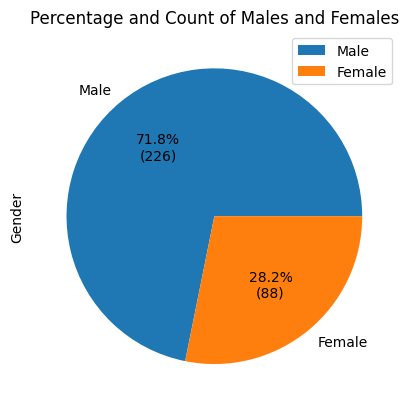

In [78]:
# Calculate the count of each gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart
ax = gender_counts.plot(kind='pie', autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*len(df))})')

# Add a title to the chart
plt.title('Percentage and Count of Males and Females')

# Add a legend
ax.legend()

# Display the chart
plt.show()

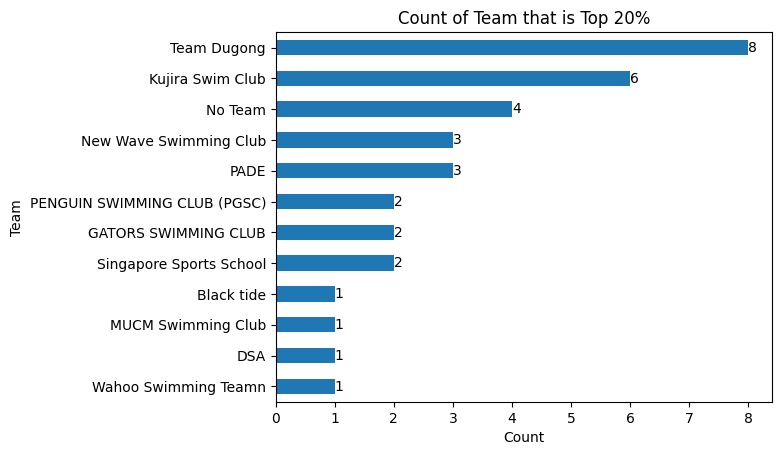

In [79]:

def plot_team_count_underthreshold(df,top_bin_threshold=4):
    # Plot the bar chart
    df = df.loc[df["TotalSecondsBin"]<=top_bin_threshold]
    ax = df['Team'].value_counts().sort_values(ascending=True).plot(kind='barh')

    # Add data labels to the bars
    ax.bar_label(ax.containers[0])

    # Add labels and title to the plot
    plt.xlabel('Count')
    plt.ylabel('Team')
    perc= (top_bin_threshold+1)*10
    plt.title(f'Count of Team that is Top {perc}%')

    # Display the plot
    plt.show()


plot_team_count_underthreshold(df,top_bin_threshold=1)


In [80]:

def top_percentage_from_time_input(time, df):

    total_seconds =convert_time_to_seconds(time_str=time)
    closest_index = df['TotalSeconds'].sub(total_seconds).abs().idxmin()
    closest_pos = df.loc[closest_index, 'Pos']
    percentage = closest_pos*100/df["Pos"].max() 
    
    # Calculate the fastest and slowest times
    fastest_time = df["TotalSeconds"].min()
    slowest_time = df["TotalSeconds"].max()

    # Convert the fastest and slowest times to HH:MM:SS format
    fastest_time_str = convert_seconds_to_time(fastest_time)
    slowest_time_str = str(datetime.timedelta(seconds=int(slowest_time)))

    return f"With the time {time} , you are in top {percentage:.2f}%. The fastest time is {fastest_time_str}. The slowest time is {slowest_time_str}."
    
    


    
    


'With the time 00:18:00 , you are in top 0.32%. The fastest time is 0:25:25. The slowest time is 1:23:20.'

With the time 00:30:00 , you are in top 3.48%. The fastest time is 0:25:25. The slowest time is 1:23:20.


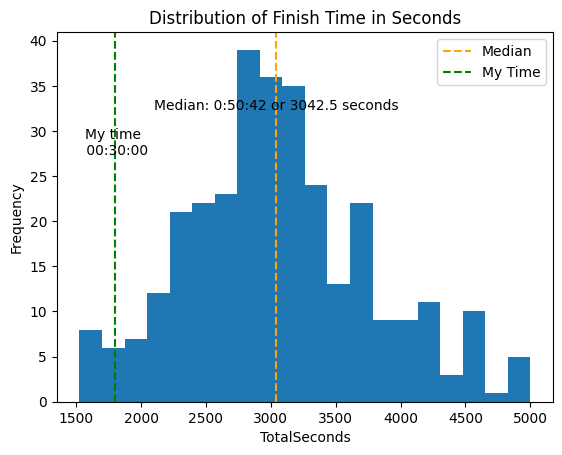

In [81]:
def plot_finish_time_dist(df,bins=10, show_median=True, show_mean=False, my_time=None):
    """
    Plot the distribution of finish time in seconds.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the finish time data.
    - show_median (bool): Whether to show the median line on the plot. Default is True.
    - show_mean (bool): Whether to show the mean line on the plot. Default is False.
    - my_time (str): The user's finish time in HH:MM:SS format. Default is None.

    Returns:
    None
    """

    # Create the histogram plot
    plt.hist(df['TotalSeconds'], bins=bins)

    if show_mean:
        # Calculate the mean of TotalSeconds
        mean_total_seconds = df['TotalSeconds'].mean()

        # Draw a line to show the mean
        plt.axvline(mean_total_seconds, color='red', linestyle='--', label='Mean')

        # Convert mean_total_seconds to HH:MM:SS format
        mean_time = str(datetime.timedelta(seconds=int(mean_total_seconds)))

        # Label the mean value
        plt.text(mean_total_seconds, plt.ylim()[1]*0.9, f'Mean: {mean_time} or {mean_total_seconds:.1f} seconds', ha='center', va='center')

    if show_median:
        # Calculate the median of TotalSeconds
        median_total_seconds = df['TotalSeconds'].median()

        # Draw a line to show the median
        plt.axvline(median_total_seconds, color='orange', linestyle='--', label='Median')

        # Convert median_total_seconds to HH:MM:SS format
        median_time = str(datetime.timedelta(seconds=int(median_total_seconds)))

        # Label the median value
        plt.text(median_total_seconds, plt.ylim()[1]*0.8, f'Median: {median_time} or {median_total_seconds:.1f} seconds', ha='center', va='center')

    if my_time is not None:
        my_time_seconds = convert_time_to_seconds(time_str=my_time)
        plt.axvline(my_time_seconds, color='green', linestyle='--', label='My Time')
        plt.text(my_time_seconds, plt.ylim()[1]*0.7, f'My time \n {my_time}', ha='center', va='center')
        print(top_percentage_from_time_input(my_time, df=df) )

    # Add labels and title to the plot
    plt.xlabel('TotalSeconds')
    plt.ylabel('Frequency')
    plt.title('Distribution of Finish Time in Seconds')

    # Show the legend
    plt.legend()

    # Display the plot
    plt.show()




plot_finish_time_dist(df=df,bins=20,show_median=True,show_mean=False,my_time="00:30:00")

In [89]:
convert_time_to_pace("00:25:25", 2000)

'0:01:16'